In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import supervision as sv

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler


In [31]:
FRAME_INDEX_COLUMN_NAME = 'frame_id'
CLASS_ID_COLUMN_NAME = 'class_id'
CONFIDENCE_COLUMN_NAME = 'confidence'
TRACKER_ID_COLUMN_NAME = 'tracker_id'
SPEED_COLUMN_NAME = 'speed'
X_COLUMN_NAME = 'x'
Y_COLUMN_NAME = 'y'

COLUMNS = [
    FRAME_INDEX_COLUMN_NAME,
    CLASS_ID_COLUMN_NAME,
    CONFIDENCE_COLUMN_NAME,
    TRACKER_ID_COLUMN_NAME,
    X_COLUMN_NAME,
    Y_COLUMN_NAME,
]

In [32]:
df = pd.read_csv('../data/content.csv')
df.head(25)

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,frame_id,xy,x,y
0,935.17175,895.11380,1245.0295,1308.2178,7,0.928468,1,0,[[ 4 191]\n [ 19 211]\n [ 7 179]\n [ 8 159]],4,191
1,2940.14500,1271.48020,3225.5164,1497.5068,2,0.896550,2,0,[[ 4 191]\n [ 19 211]\n [ 7 179]\n [ 8 159]],19,211
2,1435.65890,1084.57420,1620.9111,1230.6890,2,0.862850,3,0,[[ 4 191]\n [ 19 211]\n [ 7 179]\n [ 8 159]],7,179
3,1477.26660,1005.00854,1630.8425,1131.3215,2,0.784168,4,0,[[ 4 191]\n [ 19 211]\n [ 7 179]\n [ 8 159]],8,159
4,930.39886,897.12320,1242.7644,1313.6401,7,0.931900,1,1,[[ 4 192]\n [ 19 209]\n [ 7 180]\n [ 8 161]],4,192
5,2927.50540,1263.92430,3204.2664,1483.0889,2,0.886514,2,1,[[ 4 192]\n [ 19 209]\n [ 7 180]\n [ 8 161]],19,209
6,1435.95670,1090.92320,1621.2292,1237.1034,2,0.871194,3,1,[[ 4 192]\n [ 19 209]\n [ 7 180]\n [ 8 161]],7,180
7,1476.85360,1011.05120,1632.3100,1138.9576,2,0.702880,4,1,[[ 4 192]\n [ 19 209]\n [ 7 180]\n [ 8 161]],8,161
8,926.06420,902.37067,1239.7534,1320.7042,7,0.911087,1,2,[[ 4 193]\n [ 19 208]\n [ 7 181]\n [ 8 161]],4,193
9,2910.61870,1253.48490,3183.5637,1469.5435,2,0.887632,2,2,[[ 4 193]\n [ 19 208]\n [ 7 181]\n [ 8 161]],19,208


In [33]:
TOTAL_FRAMES = df[FRAME_INDEX_COLUMN_NAME].max()
Z_TEXT_OFFSET = 4
Z_COORDINATE = 5
DOT_SIZE = 200
FONT_SIZE = 15

In [34]:
COLORS = sv.ColorPalette.DEFAULT

def tracker2color(tracker_id: np.ndarray) -> np.ndarray:
    return np.array([
        COLORS.by_idx(i).as_hex()
        for i
        in tracker_id
    ])

In [35]:
x = 25 - df[df[FRAME_INDEX_COLUMN_NAME] == 0][X_COLUMN_NAME].to_numpy()
y = df[df[FRAME_INDEX_COLUMN_NAME] == 0][Y_COLUMN_NAME].to_numpy()
z = np.full_like(x, Z_COORDINATE)
tracker_id = df[df[FRAME_INDEX_COLUMN_NAME] == 0][TRACKER_ID_COLUMN_NAME].to_numpy()
c = np.array([
    COLORS.by_idx(idx).as_hex()
    for idx
    in tracker_id
])

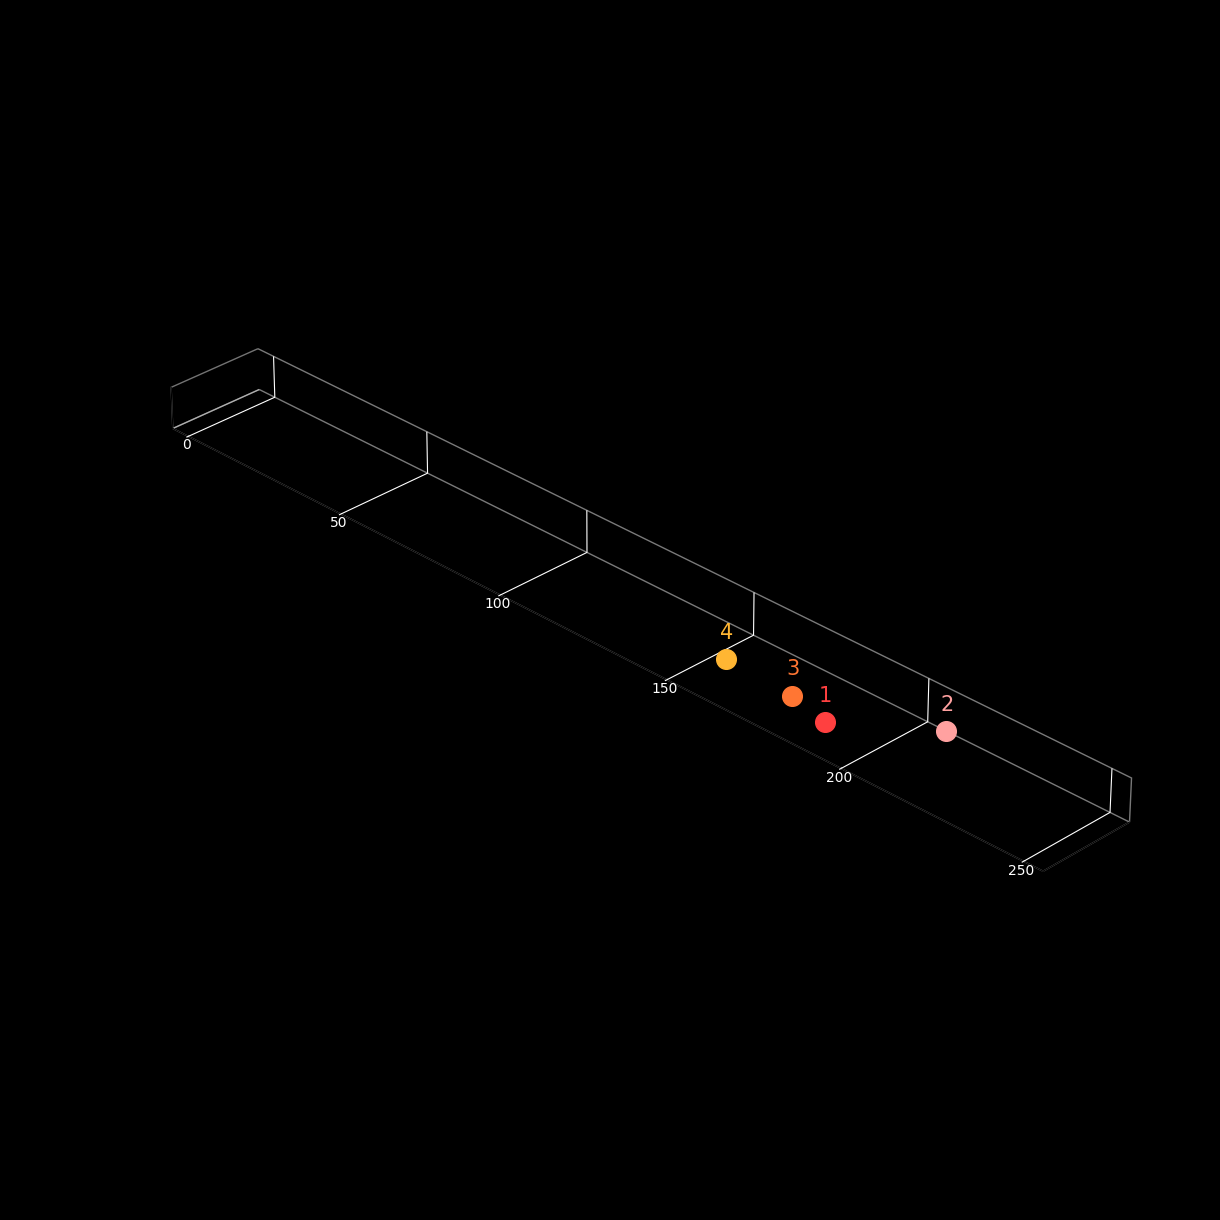

In [36]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, projection='3d', facecolor='black', position=[0, 0, 1, 1])
ax.set_xlim([0, 25])
ax.set_ylim([0, 250])
ax.set_zlim([0, 10])
ax.set_box_aspect([1,10,0.4])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.set_xticklabels([])
ax.set_zticklabels([])

ax.tick_params(axis='x', colors='none')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='none')

ax.grid(True)
ax.xaxis._axinfo["grid"].update(color = "none")
ax.yaxis._axinfo["grid"].update(color = "white")
ax.zaxis._axinfo["grid"].update(color = "none")

for i, txt in enumerate(tracker_id):
    color = c[i % len(c)]
    ax.scatter(x[i], y[i], z[i], s=DOT_SIZE, c=color, marker='o', depthshade=False)
    ax.text(x[i], y[i], z[i] + Z_TEXT_OFFSET, txt, color=color, ha='center', va='bottom', fontsize=FONT_SIZE)

ax.view_init(30, 45)

plt.show()

In [37]:
df[(df[TRACKER_ID_COLUMN_NAME] == 1) & (df[FRAME_INDEX_COLUMN_NAME] >= -5) & (df[FRAME_INDEX_COLUMN_NAME] <= 0)]

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,frame_id,xy,x,y
0,935.17175,895.1138,1245.0295,1308.2178,7,0.928468,1,0,[[ 4 191]\n [ 19 211]\n [ 7 179]\n [ 8 159]],4,191


In [38]:
x = []
y = []
z = []
tracker_id = []
c = []

for frame_index in range(TOTAL_FRAMES):
    frame_x = 25 - df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][X_COLUMN_NAME].to_numpy()
    frame_y = df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][Y_COLUMN_NAME].to_numpy()
    frame_tracker_id = df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][TRACKER_ID_COLUMN_NAME].to_numpy()

    frame_z = np.full_like(frame_x, Z_COORDINATE)
    frame_c = np.array([COLORS.by_idx(i).as_hex() for i in frame_tracker_id])\

    x.append(frame_x)
    y.append(frame_y)
    z.append(frame_z)

    tracker_id.append(frame_tracker_id)
    c.append(frame_c)

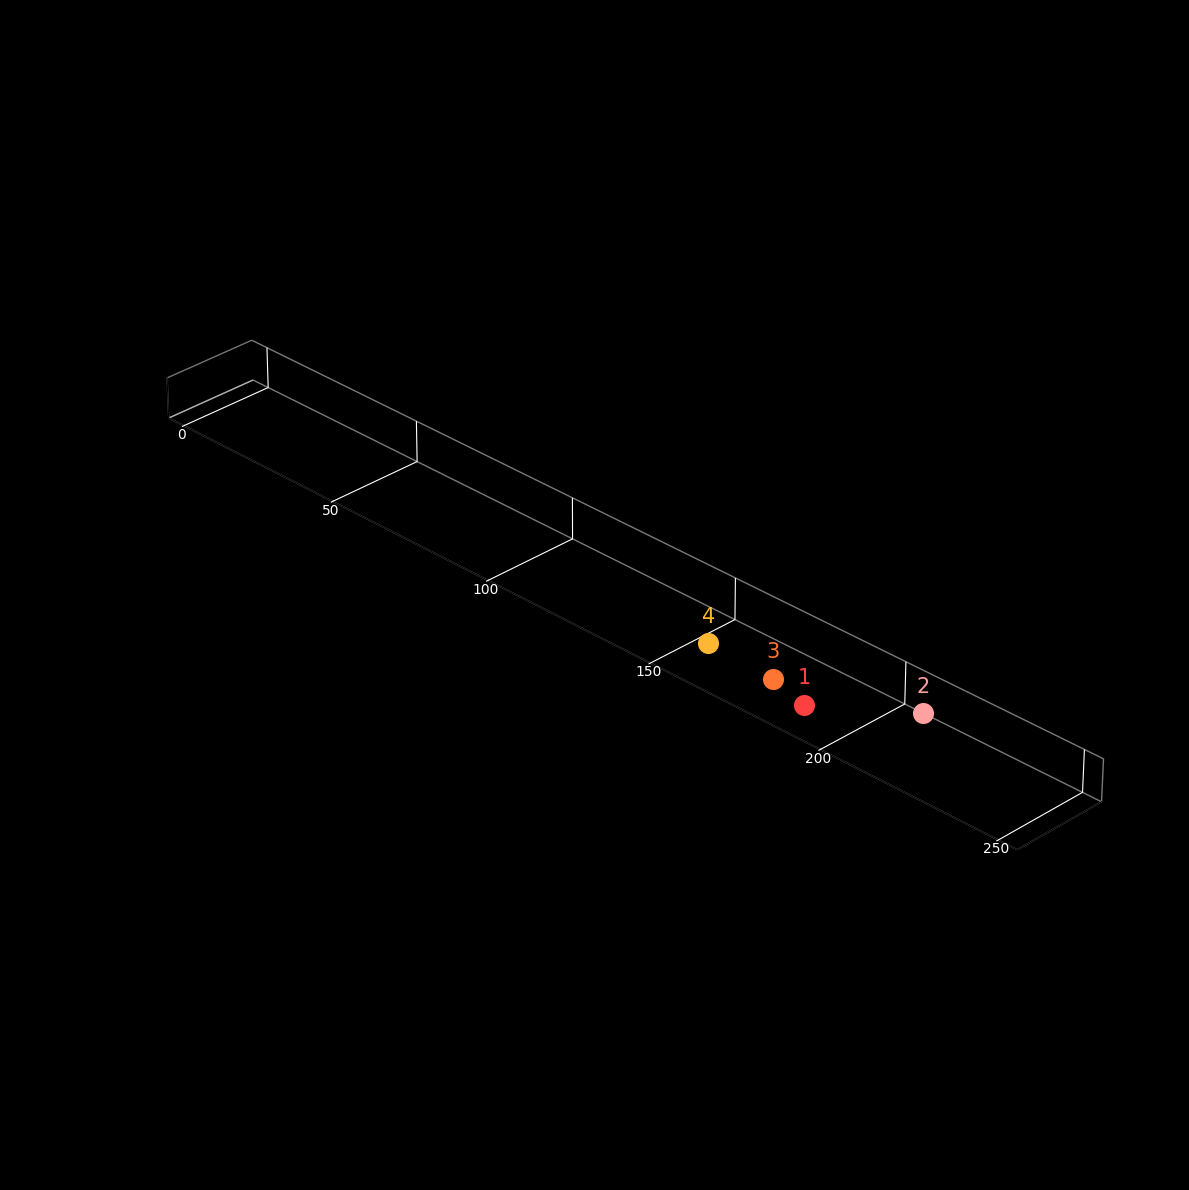

In [39]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, projection='3d', facecolor='black', position=[0, 0, 1, 1])
ax.set_xlim([0, 25])
ax.set_ylim([0, 250])
ax.set_zlim([0, 10])
ax.set_box_aspect([1,10,0.4])

# Remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Hide labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(axis='x', colors='none')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='none')

# Adjust grid
ax.grid(True)
ax.xaxis._axinfo["grid"].update(color = "none")
ax.yaxis._axinfo["grid"].update(color = "white")
ax.zaxis._axinfo["grid"].update(color = "none")

def update(frame):
    ax.cla() # Clear the previous drawings
    # Reset limits and aspects as they are cleared with cla()
    ax.set_xlim([0, 25])
    ax.set_ylim([0, 250])
    ax.set_zlim([0, 10])
    ax.set_box_aspect([1,10,0.4])
    ax.set_facecolor('black')
    # Re-apply label and tick settings
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    ax.tick_params(axis='y', colors='white')
    ax.grid(True)
    ax.yaxis._axinfo["grid"].update(color = "white")
    # Plot current frame
    x, y, z, c, tracker_id = frame
    for i, txt in enumerate(tracker_id):
        color = c[i % len(c)]
        ax.scatter(x[i], y[i], z[i], s=DOT_SIZE, c=color, marker='o', depthshade=False)
        ax.text(x[i], y[i], z[i] + Z_TEXT_OFFSET, txt, color=color, ha='center', va='bottom', fontsize=FONT_SIZE)
    ax.view_init(30, 45)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=zip(x, y, z, c, tracker_id), blit=False)

# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animation.mp4', writer=writer)

In [40]:
x = []
y = []
z = []
tracker_id = []
c = []

for frame_index in range(TOTAL_FRAMES):
    frame_x = 25 - df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][X_COLUMN_NAME].to_numpy()
    frame_y = df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][Y_COLUMN_NAME].to_numpy()
    frame_tracker_id = df[df[FRAME_INDEX_COLUMN_NAME] == frame_index][TRACKER_ID_COLUMN_NAME].to_numpy()

    frame_z = np.full_like(frame_x, Z_COORDINATE)
    frame_c = np.array([COLORS.by_idx(i + 1).as_hex() for i in frame_tracker_id])

    x.append(frame_x)
    y.append(frame_y)
    z.append(frame_z)

    tracker_id.append(frame_tracker_id)
    c.append(frame_c)

In [41]:
def rotation_angle(frame_number, total_frames, rotation=360):
    return (frame_number / total_frames) * rotation

<ipython-input-67-237204a84284>:56: UserWarning: frames=<zip object at 0x7d0a393c1180> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, frames=zip(x, y, z, c, tracker_id, range(TOTAL_FRAMES)), blit=False)


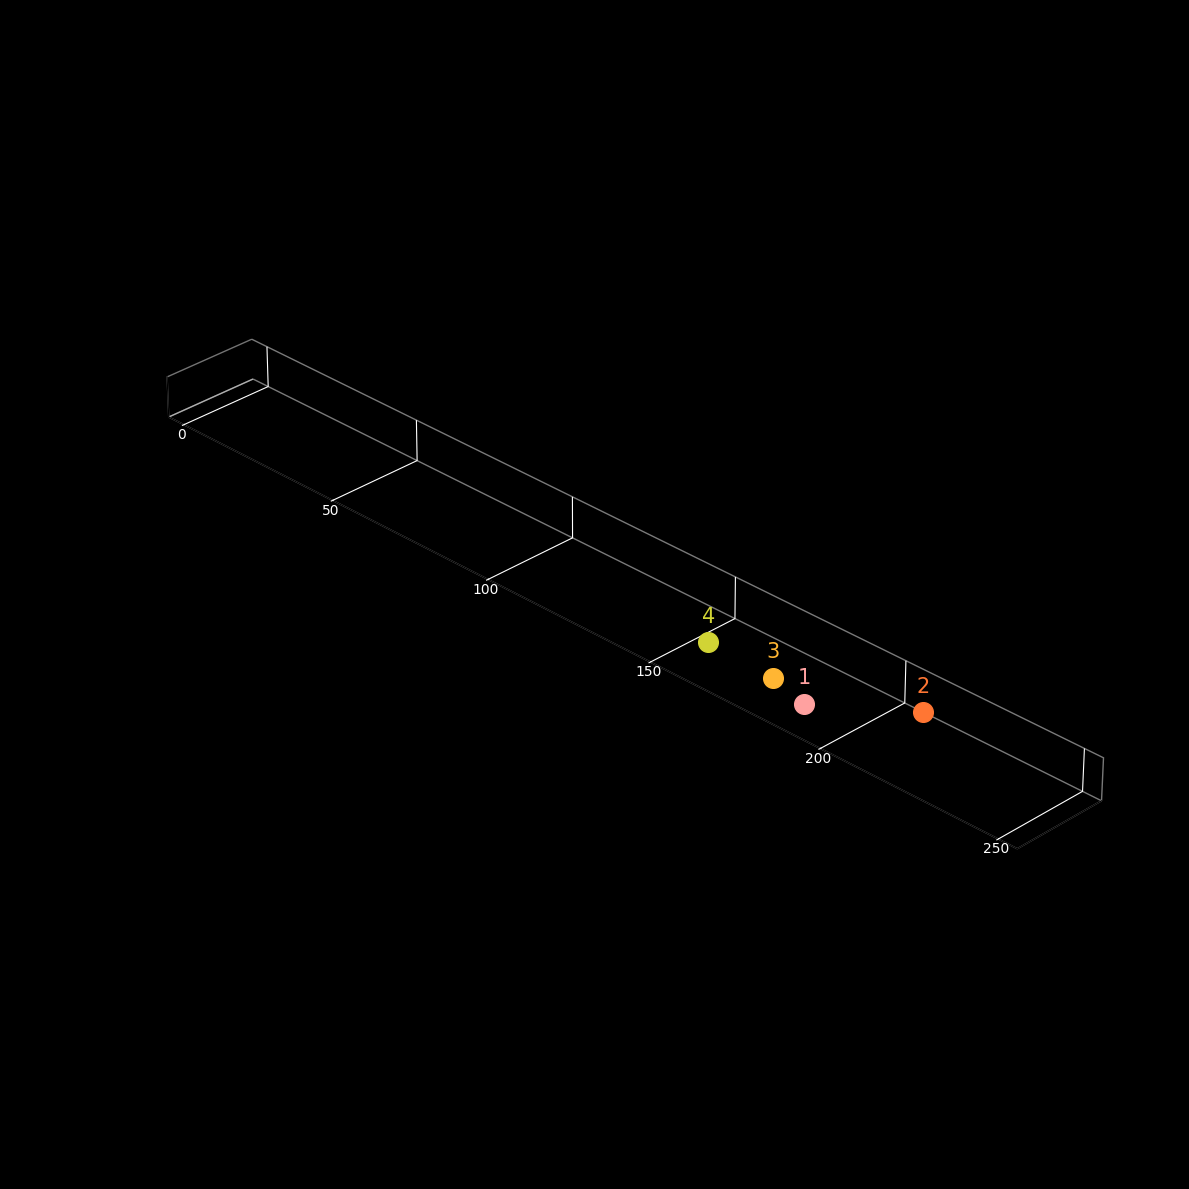

In [ ]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, projection='3d', facecolor='black', position=[-0.2, -0.2, 1.4, 1.4])
ax.set_xlim([0, 25])
ax.set_ylim([0, 250])
ax.set_zlim([0, 10])
ax.set_box_aspect([1,10,0.4])

# Remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Hide labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(axis='x', colors='none')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='none')

# Adjust grid
ax.grid(True)
ax.xaxis._axinfo["grid"].update(color = "none")
ax.yaxis._axinfo["grid"].update(color = "white")
ax.zaxis._axinfo["grid"].update(color = "none")

def update(frame):
    ax.cla() # Clear the previous drawings
    # Reset limits and aspects as they are cleared with cla()
    ax.set_xlim([0, 25])
    ax.set_ylim([0, 250])
    ax.set_zlim([0, 10])
    ax.set_box_aspect([1,10,0.4])
    ax.set_facecolor('black')
    # Re-apply label and tick settings
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    ax.tick_params(axis='y', colors='white')
    ax.grid(True)
    ax.yaxis._axinfo["grid"].update(color = "white")
    # Plot current frame
    x, y, z, c, tracker_id, frame_number = frame
    for i, txt in enumerate(tracker_id):
        color = c[i % len(c)]
        ax.scatter(x[i], y[i], z[i], s=DOT_SIZE, c=color, marker='o', depthshade=False)
        ax.text(x[i], y[i], z[i] + Z_TEXT_OFFSET, txt, color=color, ha='center', va='bottom', fontsize=FONT_SIZE)
    angle = rotation_angle(frame_number, TOTAL_FRAMES, 180)
    ax.view_init(30, 45 + angle)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=zip(x, y, z, c, tracker_id, range(TOTAL_FRAMES)), blit=False)

# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animation.mp4', writer=writer)

In [42]:
FRAME_INDEX = 40
TRACE_LENGTH = 50

x_end = 25 - df[df[FRAME_INDEX_COLUMN_NAME] == FRAME_INDEX][X_COLUMN_NAME].to_numpy()
y_end = df[df[FRAME_INDEX_COLUMN_NAME] == FRAME_INDEX][Y_COLUMN_NAME].to_numpy()
z_end = np.full_like(x_end, Z_COORDINATE)
tracker_id = df[df[FRAME_INDEX_COLUMN_NAME] == FRAME_INDEX][TRACKER_ID_COLUMN_NAME].to_numpy()
c = tracker2color(tracker_id)

x_start = []
y_start = []

for i in tracker_id:
    df_temp = df[(df[TRACKER_ID_COLUMN_NAME] == i)]
    frame_index_start = max(df_temp[FRAME_INDEX_COLUMN_NAME].min(), FRAME_INDEX - TRACE_LENGTH)
    start_point = df_temp[df_temp[FRAME_INDEX_COLUMN_NAME] == frame_index_start].iloc[0]
    x_start.append(start_point['x'])
    y_start.append(start_point['y'])

x_start = 25 - np.array(x_start)
y_start = np.array(y_start)

z_start = np.full_like(x_start, Z_COORDINATE)

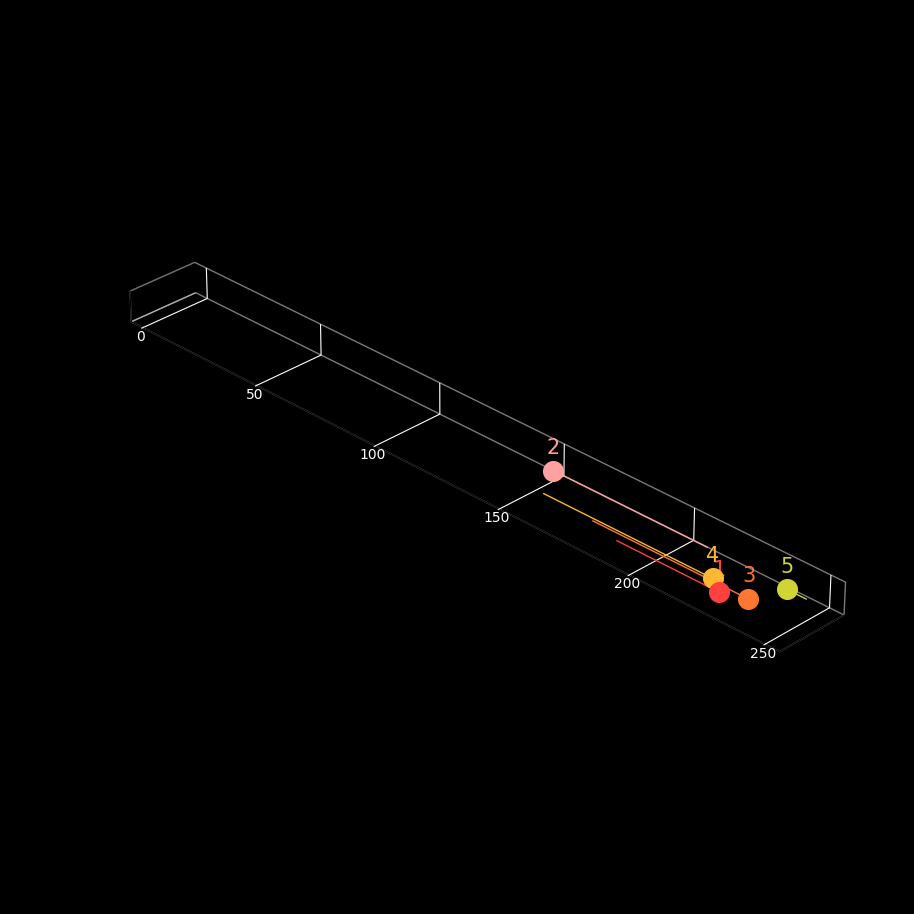

In [43]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
fig.patch.set_facecolor('black')

ax = fig.add_subplot(111, projection='3d', facecolor='black', position=[0, 0, 1, 1])
ax.set_xlim([0, 25])
ax.set_ylim([0, 250])
ax.set_zlim([0, 10])
ax.set_box_aspect([1, 10, 0.4])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.set_xticklabels([])
ax.set_zticklabels([])

ax.tick_params(axis='x', colors='none')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='none')

ax.grid(True)
ax.xaxis._axinfo["grid"].update(color="none")
ax.yaxis._axinfo["grid"].update(color="white")
ax.zaxis._axinfo["grid"].update(color="none")

# Refactored to use start and end arrays for traces
for i, txt in enumerate(tracker_id):
    color = c[i % len(c)]
    ax.scatter(x_end[i], y_end[i], z_end[i], s=DOT_SIZE, c=color, marker='o', depthshade=False)
    ax.plot([x_start[i], x_end[i]], [y_start[i], y_end[i]], [z_start[i], z_end[i]], color=color, linewidth=1)
    ax.text(x_end[i], y_end[i], z_end[i] + Z_TEXT_OFFSET, txt, color=color, ha='center', va='bottom', fontsize=FONT_SIZE)

ax.view_init(30, 45)

In [44]:
# max_frame_index = df[FRAME_INDEX_COLUMN_NAME].max()
max_frame_index = 300
TRACE_LENGTH = 50
Z_COORDINATE = 0

all_x_end, all_y_end, all_z_end = [], [], []
all_tracker_id, all_colors = [], []
all_x_start, all_y_start, all_z_start = [], [], []

for FRAME_INDEX in range(max_frame_index + 1):
    frame_data = df[df[FRAME_INDEX_COLUMN_NAME] == FRAME_INDEX]
    x_end = 25 - frame_data[X_COLUMN_NAME].to_numpy()
    y_end = frame_data[Y_COLUMN_NAME].to_numpy()
    z_end = np.full_like(x_end, Z_COORDINATE)
    tracker_id = frame_data[TRACKER_ID_COLUMN_NAME].to_numpy()
    colors = tracker2color(tracker_id)

    x_start_temp, y_start_temp = [], []

    for id_val in tracker_id:
        df_temp = df[df[TRACKER_ID_COLUMN_NAME] == id_val]
        frame_index_start = max(df_temp[FRAME_INDEX_COLUMN_NAME].min(), FRAME_INDEX - TRACE_LENGTH)
        start_point = df_temp[df_temp[FRAME_INDEX_COLUMN_NAME] == frame_index_start].iloc[0]
        x_start_temp.append(start_point[X_COLUMN_NAME])
        y_start_temp.append(start_point[Y_COLUMN_NAME])

    x_start = 25 - np.array(x_start_temp)
    y_start = np.array(y_start_temp)
    z_start = np.full_like(x_start, Z_COORDINATE)

    all_x_end.append(x_end)
    all_y_end.append(y_end)
    all_z_end.append(z_end)
    all_tracker_id.append(tracker_id)
    all_colors.append(colors)
    all_x_start.append(x_start)
    all_y_start.append(y_start)
    all_z_start.append(z_start)

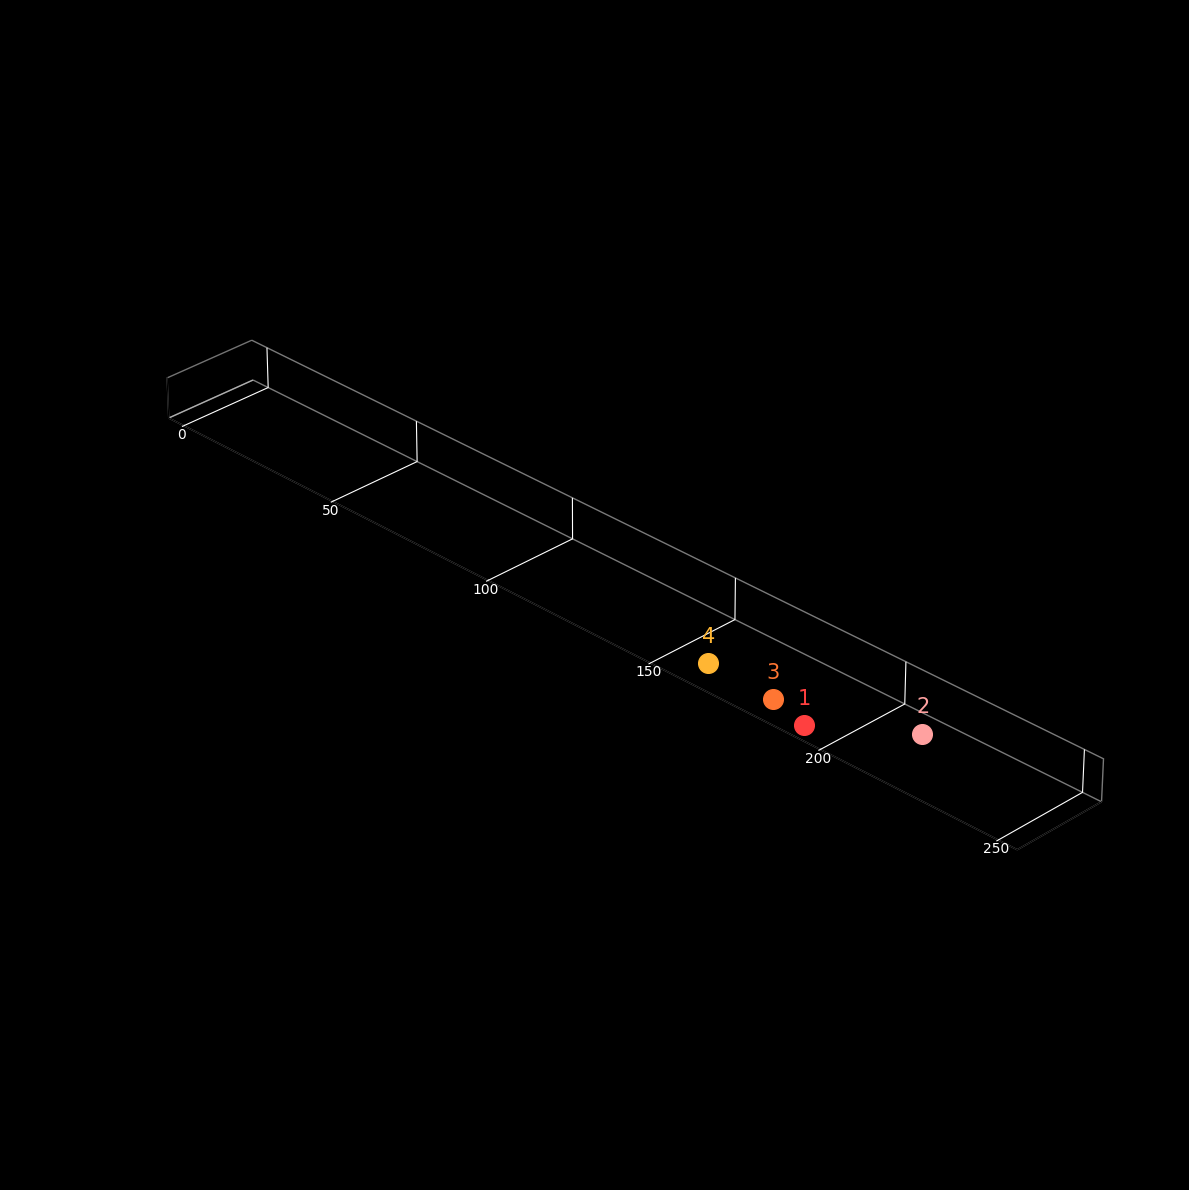

In [45]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, projection='3d', facecolor='black', position=[0, 0, 1, 1])
ax.set_xlim([0, 25])
ax.set_ylim([0, 250])
ax.set_zlim([0, 10])
ax.set_box_aspect([1,10,0.4])

# Remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Hide labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(axis='x', colors='none')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='none')

# Adjust grid
ax.grid(True)
ax.xaxis._axinfo["grid"].update(color = "none")
ax.yaxis._axinfo["grid"].update(color = "white")
ax.zaxis._axinfo["grid"].update(color = "none")

def update(frame):
    ax.cla() # Clear the previous drawings
    # Reset limits and aspects as they are cleared with cla()
    ax.set_xlim([0, 25])
    ax.set_ylim([0, 250])
    ax.set_zlim([0, 10])
    ax.set_box_aspect([1,10,0.4])
    ax.set_facecolor('black')
    # Re-apply label and tick settings
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    ax.tick_params(axis='y', colors='white')
    ax.grid(True)
    ax.yaxis._axinfo["grid"].update(color = "white")
    # Plot current frame
    x_start, y_start, z_start, x_end, y_end, z_end, c, tracker_id = frame
    for i, txt in enumerate(tracker_id):
        color = c[i % len(c)]
        ax.plot([x_start[i], x_end[i]], [y_start[i], y_end[i]], [z_start[i], z_end[i]], color=color, linewidth=1)
        ax.scatter(x_end[i], y_end[i], z_end[i], s=DOT_SIZE, c=color, marker='o', depthshade=False)
        ax.text(x_end[i], y_end[i], z_end[i] + Z_TEXT_OFFSET, txt, color=color, ha='center', va='bottom', fontsize=FONT_SIZE)
    ax.view_init(30, 45)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=zip(all_x_start, all_y_start, all_z_start, all_x_end, all_y_end, all_z_end, all_colors, all_tracker_id), blit=False)

# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animation.mp4', writer=writer)